# Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Main Foerst

In [27]:
df = pd.read_csv('/Users/boscoll/Downloads/Fig3h_main_forest_plot 1.csv', index_col=0)

In [28]:
order = [
        'RB1_het_loss_uni',
    'RB1_het_loss',
       'RB1_Other_LOH_uni',
    'RB1_Other_LOH', 
        'RB1_OS_het_loss',
    'RB1_OS_het_loss_multi',
    'RB1_OS_Other_LOH',
    'RB1_OS_Other_LOH_multi'
]

df  = df.reindex(order)

In [30]:
df = df.reset_index('comparison')

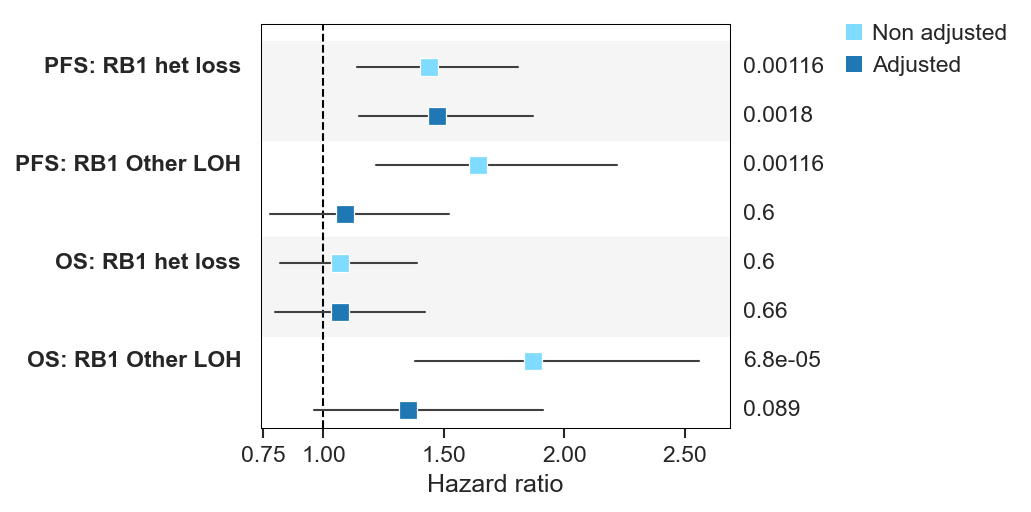

In [ ]:

plot_df = df.copy()

# position and palette
ypos = np.arange(len(plot_df))  # one y per row
plot_df['ypos'] = ypos

palette = {'uni': '#7FDBFF',      
           'multi': '#1f77b4'}   

sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(4.5, 3.5), dpi=150)

# light alternating background bands 
for i in range(0, len(plot_df), 4):
    ax.axhspan(i-0.5, i+1.5, color='0.96', zorder=0)

# reference line at HR = 1
ax.axvline(1, ls='--', lw=1, color='black', zorder=1)


for _, r in plot_df.iterrows():
    # CI bar
    ax.plot([r['CI.low'], r['CI.high']], [r['ypos'], r['ypos']],
            color='0.25', lw=1, solid_capstyle='round', zorder=2)
    # square marker at HR
    ax.scatter(r['HR'], r['ypos'],
               s=70, marker='s',
               color=palette.get(r['Uni_Multi'], '#1f77b4'),
               edgecolor='white', linewidth=0.6,
               zorder=3)

# y axis
ax.set_yticks(ypos)
ax.set_yticklabels(plot_df['comparison'])
ax.invert_yaxis()  
ax.grid(False)
#manual reannotation of labels
ax.set_yticklabels(
    [
    'PFS: RB1 het loss',
    '',
    'PFS: RB1 Other LOH',
    '',
    'OS: RB1 het loss',
    '',
    'OS: RB1 Other LOH',
    ''],
    # #put HR and confidence intervals in the y axis labels
    # [f"{row['HR']:.2f} ({row['CI.low']:.2f} - {row['CI.high']:.2f})"
    #  for _, row in plot_df.iterrows()],
    fontsize=11, 
    fontweight='bold', 
    va ='center')


# x axis
ax.set_xticks([0.75, 1, 1.5, 2, 2.5])
ax.tick_params(axis='x',
               which='major',
               bottom=True, top=False,    
               length=5, width=1,         
               direction='out')


# major axis
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

# x range
xmin = max(0.1, plot_df['CI.low'].min()*0.95)
xmax = plot_df['CI.high'].max()*1.05
ax.set_xlim(xmin, xmax)
ax.set_xlabel('Hazard ratio')
ax.set_ylabel('')

# p values
for _, r in plot_df.iterrows():
    ax.text(xmax*1.02, r['ypos'], f"{r['p']}",
            va='center', ha='left', fontsize=11)

plt.subplots_adjust(right=0.82)

# legend
from matplotlib.lines import Line2D
square = dict(linestyle='None', marker='s', markersize=8, markeredgecolor='none')
handles = [
    Line2D([0], [0], **square, markerfacecolor=palette['uni'],  label='Non adjusted'),
    Line2D([0], [0], **square, markerfacecolor=palette['multi'], label='Adjusted'),
]
ax.legend(handles=handles,
          loc='upper left', bbox_to_anchor=(1.2, 1.05),
          frameon=False, handlelength=0.8, handletextpad=0.4, 
          fontsize=11
          )


#for modifying text in illustrator
import matplotlib as mpl
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['font.family'] = 'Arial'  

# sns.despine(left=True, bottom=False)
plt.savefig('/Users/boscoll/Desktop/Projects/Anton_RB1/results/forest_plot.svg', bbox_inches='tight')
plt.show()

# Forest for supplementary

## 1

In [69]:
df = pd.read_csv('/Users/boscoll/Desktop/Projects/Anton_RB1/data/Supp_BRCA2_other_treatment_types_forest_plot.csv', index_col=0)
oreder = [
    'BRCA2_PFS_multi', 
    'BRCA2_ET_multi',
    'BRCA2_cape_multi', 
    'BRCA2_Ivchemo_multi', 
     'BRCA2_everolimus_multi', 
     'BRCA2_ADC_multi', 
     'BRCA2_OS_multi'
]
df  = df.reindex(oreder)
df = df.reset_index('comparison')
df['p'] = [0.0001 if i == "1.60 e -5" else float(i) for i in df['p']]
df['p'] = ['<0.001' if p < 0.001 else f"{p:.2f}" for p in df['p']]


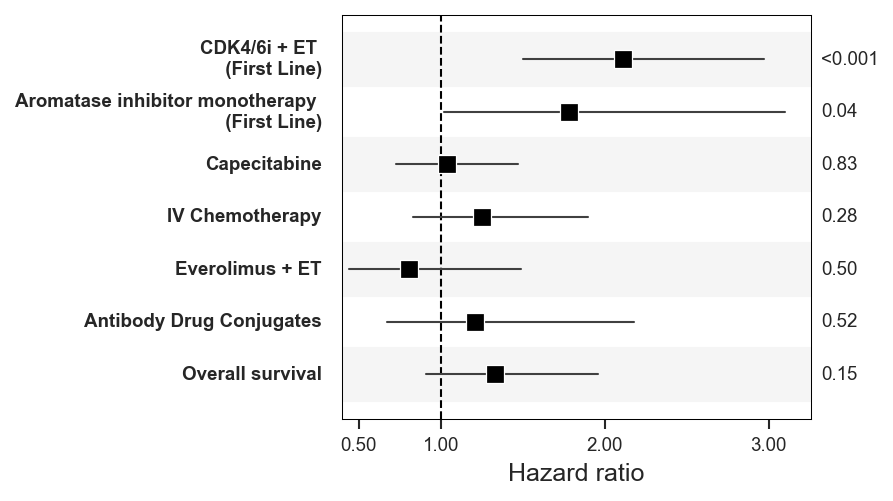

In [13]:

plot_df = df.copy()

# position and palette
ypos = np.arange(len(plot_df))  # one y per row
plot_df['ypos'] = ypos


sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(4.5, 3.5), dpi=150)

# light alternating background bands 
for i in range(0, len(plot_df), 2):
    ax.axhspan(i-0.5, i+0.5, color='0.96', zorder=0)

# reference line at HR = 1
ax.axvline(1, ls='--', lw=1, color='black', zorder=1)


for _, r in plot_df.iterrows():
    # CI bar
    ax.plot([r['CI.low'], r['CI.high']], [r['ypos'], r['ypos']],
            color='0.25', lw=1, solid_capstyle='round', zorder=2)
    # square marker at HR
    ax.scatter(r['HR'], r['ypos'],
               s=70, marker='s',
                color='black',
               edgecolor='white', linewidth=0.6,
               zorder=3)

# y axis
ax.set_yticks(ypos)
ax.set_yticklabels(plot_df['comparison'])
ax.invert_yaxis()  
ax.grid(False)
#manual reannotation of labels
ax.set_yticklabels(
    [
    'CDK4/6i + ET \n (First Line)',
    'Aromatase inhibitor monotherapy \n (First Line)',
    'Capecitabine',
    'IV Chemotherapy',
    'Everolimus + ET',
    'Antibody Drug Conjugates',
    'Overall survival'
    ],
    # #put HR and confidence intervals in the y axis labels
    # [f"{row['HR']:.2f} ({row['CI.low']:.2f} - {row['CI.high']:.2f})"
    #  for _, row in plot_df.iterrows()],
    fontsize=9, 
    fontweight='bold', 
    va ='center')


# x axis
ax.set_xticks([0.25, 0.5,  1, 2, 3])
ax.tick_params(axis='x',
               which='major',
               bottom=True, top=False,    
               length=5, width=1,         
               direction='out')
ax.tick_params(axis='x', labelsize=9)


# major axis
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

# x range
xmin = max(0.1, plot_df['CI.low'].min()*0.9)
xmax = plot_df['CI.high'].max()*1.05
ax.set_xlim(xmin, xmax)
ax.set_xlabel('Hazard ratio')
ax.set_ylabel('')

# p values
for _, r in plot_df.iterrows():
    ax.text(xmax*1.02, r['ypos'], f"{r['p']}",
            va='center', ha='left', fontsize=9)

plt.subplots_adjust(right=0.82)


#for modifying text in illustrator
import matplotlib as mpl
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['font.family'] = 'Arial'  

# sns.despine(left=True, bottom=False)
plt.savefig('/Users/boscoll/Desktop/Projects/Anton_RB1/results/supplementary_1.pdf', bbox_inches='tight')
plt.show()

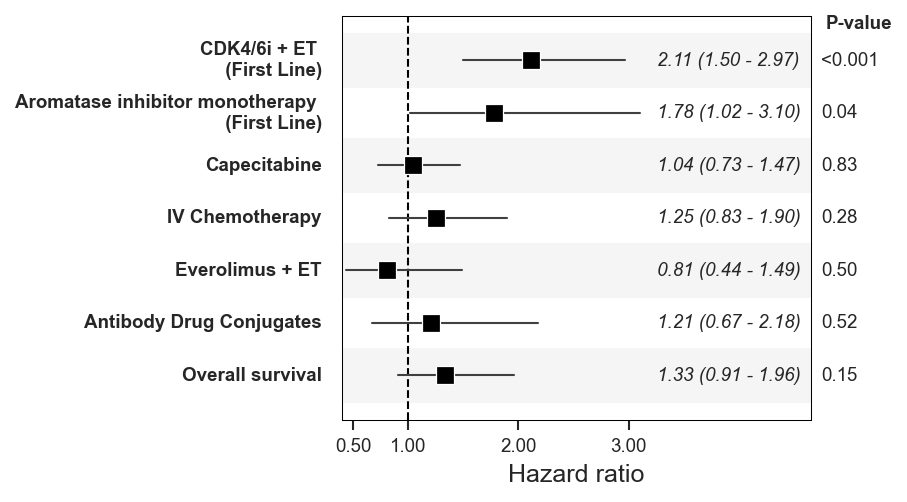

In [70]:
### with condifence intervals


plot_df = df.copy()

# position and palette
ypos = np.arange(len(plot_df))  # one y per row
plot_df['ypos'] = ypos


sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(4.5, 3.5), dpi=150)

# light alternating background bands 
for i in range(0, len(plot_df), 2):
    ax.axhspan(i-0.5, i+0.5, color='0.96', zorder=0)

# reference line at HR = 1
ax.axvline(1, ls='--', lw=1, color='black', zorder=1)


for _, r in plot_df.iterrows():
    # CI bar
    ax.plot([r['CI.low'], r['CI.high']], [r['ypos'], r['ypos']],
            color='0.25', lw=1, solid_capstyle='round', zorder=2)
    # square marker at HR
    ax.scatter(r['HR'], r['ypos'],
               s=70, marker='s',
                color='black',
               edgecolor='white', linewidth=0.6,
               zorder=3)

# y axis
ax.set_yticks(ypos)
ax.set_yticklabels(plot_df['comparison'])
ax.invert_yaxis()  
ax.grid(False)
#manual reannotation of labels
ax.set_yticklabels(
    [
    'CDK4/6i + ET \n (First Line)',
    'Aromatase inhibitor monotherapy \n (First Line)',
    'Capecitabine',
    'IV Chemotherapy',
    'Everolimus + ET',
    'Antibody Drug Conjugates',
    'Overall survival'
    ],
    # #put HR and confidence intervals in the y axis labels
    # [f"{row['HR']:.2f} ({row['CI.low']:.2f} - {row['CI.high']:.2f})"
    #  for _, row in plot_df.iterrows()],
    fontsize=9, 
    fontweight='bold', 
    va ='center')


#confidence intervals
for _, r in plot_df.iterrows():
    ax.text(plot_df['CI.high'].max()*1.05, r['ypos'], f"{r['HR']:.2f} ({r['CI.low']:.2f} - {r['CI.high']:.2f})",
            va='center', ha='left', fontsize=9, fontstyle='italic')

# x axis
ax.set_xticks([0.25, 0.5,  1, 2, 3])
ax.tick_params(axis='x',
               which='major',
               bottom=True, top=False,    
               length=5, width=1,         
               direction='out')
ax.tick_params(axis='x', labelsize=9)


# major axis
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

# x range
xmin = max(0.1, plot_df['CI.low'].min()*0.9)
xmax = plot_df['CI.high'].max()*1.5
ax.set_xlim(xmin, xmax)
ax.set_xlabel('Hazard ratio')
ax.set_ylabel('')

# p values
for _, r in plot_df.iterrows():
    ax.text(xmax*1.02, r['ypos'], f"{r['p']}",
            va='center', ha='left', fontsize=9)
    
    
ax.text(xmax * 1.03, -0.7, 'P-value', va='center', ha='left', fontsize=9, fontweight='bold')

plt.subplots_adjust(right=0.82)


#for modifying text in illustrator
import matplotlib as mpl
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['font.family'] = 'Arial'  

# sns.despine(left=True, bottom=False)
plt.savefig('/Users/boscoll/Desktop/Projects/Anton_RB1/results/supplementary_1.pdf', bbox_inches='tight')
plt.show()


## 2

In [2]:
df = pd.read_csv('/Users/boscoll/Desktop/Projects/Anton_RB1/data/Supp_other_treatment_random_LOH.csv').dropna()

In [3]:
df['p'] = ['<0.001' if p < 0.001 else f"{p:.2f}" for p in df['p']]

In [4]:
df = df.loc[21:]

In [5]:
df

,comparison,Uni_Multi,Type,HR,CI.low,CI.high,p,n_mut,n_ctrl
21,APC_het_loss,uni,random,1.40,0.99,1.98,0.05,51.0,446.0
22,APC_het_loss,multi,random,1.07,0.71,1.63,0.75,51.0,446.0
23,APC_Other_LOH,uni,random,1.58,1.06,2.35,0.02,40.0,446.0
24,APC_Other_LOH,multi,random,1.07,0.73,1.57,0.74,40.0,446.0
25,WT1_het_loss,uni,random,1.19,0.89,1.59,0.24,84.0,415.0
26,WT1_het_loss,multi,random,1.10,0.81,1.48,0.54,84.0,415.0
27,WT1_Other_LOH,uni,random,1.63,1.14,2.33,0.01,49.0,415.0
28,WT1_Other_LOH,multi,random,1.09,0.75,1.59,0.65,49.0,415.0
29,NF2_het_loss,uni,random,0.87,0.68,1.10,0.24,194.0,257.0
30,NF2_het_loss,multi,random,0.96,0.75,1.23,0.74,194.0,257.0


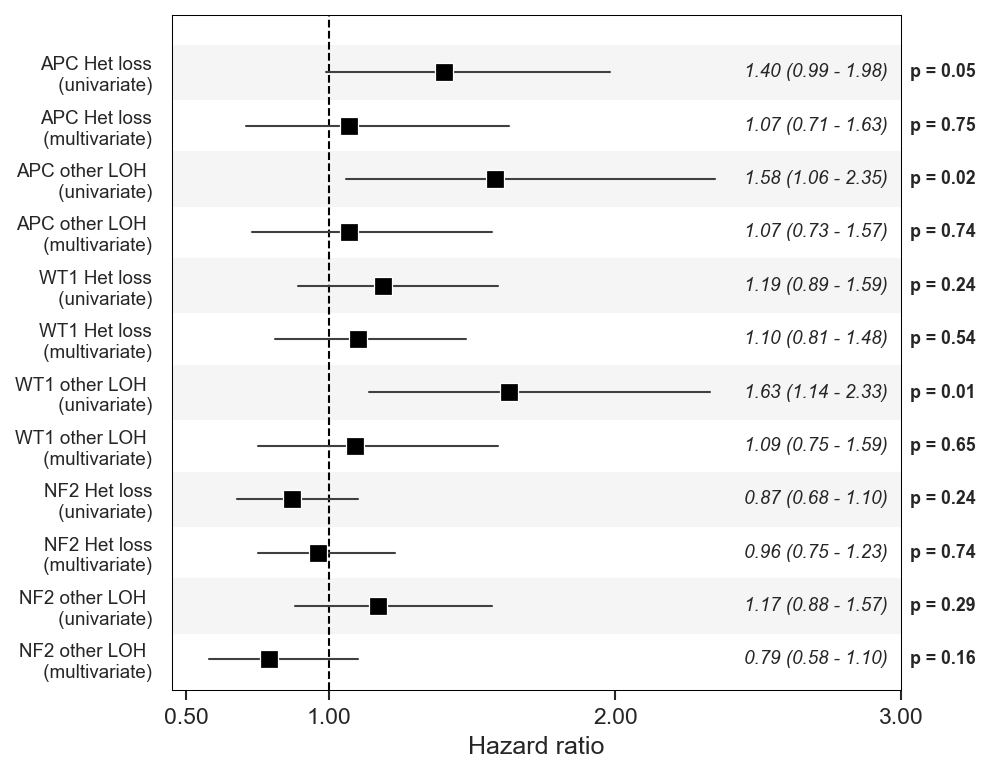

In [ ]:

plot_df = df.copy()

# position and palette
ypos = np.arange(len(plot_df))  # one y per row
plot_df['ypos'] = ypos

sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(7, 10), dpi=150)

# light alternating background bands 
for i in range(0, len(plot_df), 2):
    ax.axhspan(i-0.5, i+0.5, color='0.96', zorder=0)


# reference line at HR = 1
ax.axvline(1, ls='--', lw=1, color='black', zorder=1)


for _, r in plot_df.iterrows():
    # CI bar
    ax.plot([r['CI.low'], r['CI.high']], [r['ypos'], r['ypos']],
            color='0.25', lw=1, solid_capstyle='round', zorder=2)
    # square marker at HR
    ax.scatter(r['HR'], r['ypos'],
               s=70, marker='s',
               color = 'black',
               edgecolor='white', linewidth=0.6,
               zorder=3)
    
## confidence intervals 
for _, r in plot_df.iterrows():
    ax.text(2.45, r['ypos'], f"{r['HR']:.2f} ({r['CI.low']:.2f} - {r['CI.high']:.2f})",
            va='center', ha='left', fontsize=9, fontstyle='italic')

# y axis
ax.set_yticks(ypos)
ax.set_yticklabels(plot_df['comparison'])
ax.invert_yaxis()  
ax.grid(False)
ax.tick_params(axis='y', labelsize=9)
ax.set_yticklabels(
    ['APC Het loss\n (univariate)',
     'APC Het loss\n (multivariate)',
     'APC other LOH \n (univariate)',
     'APC other LOH \n (multivariate)',
     'WT1 Het loss\n (univariate)',
     'WT1 Het loss\n (multivariate)',
     'WT1 other LOH \n (univariate)',
     'WT1 other LOH \n (multivariate)',
     'NF2 Het loss\n (univariate)',
     'NF2 Het loss\n (multivariate)',
     'NF2 other LOH \n (univariate)',
        'NF2 other LOH \n (multivariate)']
)



# x axis
ax.set_xticks([0.25, 0.5, 1, 2, 3, 4])
ax.tick_params(axis='x',
               which='major',
               bottom=True, top=False,    
               length=5, width=1,         
               direction='out')


# major axis
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

# x range
xmin = 0.45
xmax = 3
ax.set_xlim(xmin, xmax)
ax.set_xlabel('Hazard ratio')
ax.set_ylabel('')

# p values
for _, r in plot_df.iterrows():
   ax.text(xmax*1.01, r['ypos'], f"p = {r['p']}",
            va='center', ha='left', fontsize=8.5, fontweight='bold')

plt.subplots_adjust(right=0.82, top =0.5, bottom=0.05)

#for modifying text in illustrator
import matplotlib as mpl
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['font.family'] = 'Arial'  

# sns.despine(left=True, bottom=False)
plt.savefig('/Users/boscoll/Desktop/Projects/Anton_RB1/results/supplementary_2.pdf', bbox_inches='tight')
plt.show()

In [9]:
df = df.query('Uni_Multi.str.contains("multi")', engine="python")

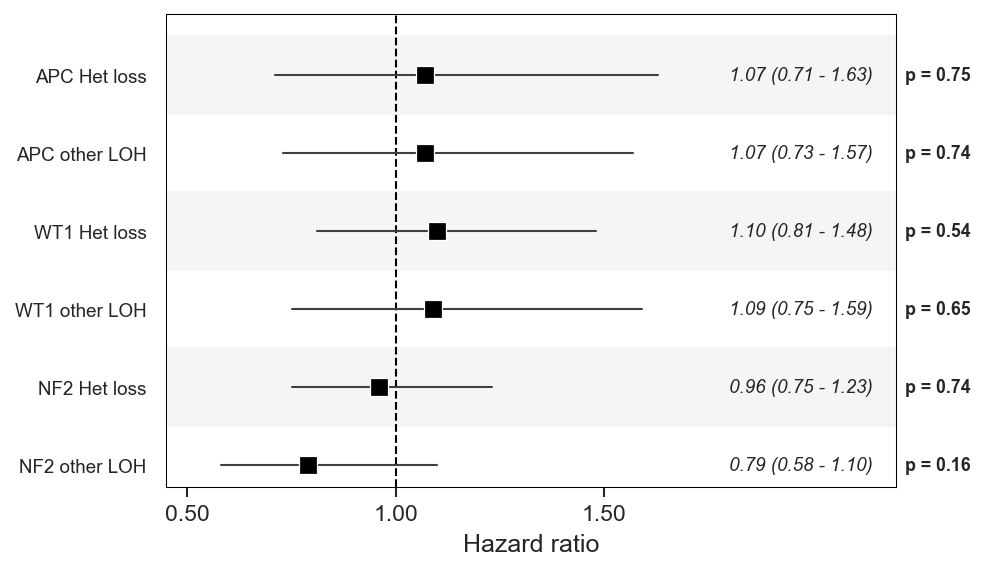

In [ ]:

plot_df = df.copy()

# position and palette
ypos = np.arange(len(plot_df))  # one y per row
plot_df['ypos'] = ypos

sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(7, 7), dpi=150)

# light alternating background bands 
for i in range(0, len(plot_df), 2):
    ax.axhspan(i-0.5, i+0.5, color='0.96', zorder=0)


# reference line at HR = 1
ax.axvline(1, ls='--', lw=1, color='black', zorder=1)


for _, r in plot_df.iterrows():
    # CI bar
    ax.plot([r['CI.low'], r['CI.high']], [r['ypos'], r['ypos']],
            color='0.25', lw=1, solid_capstyle='round', zorder=2)
    # square marker at HR
    ax.scatter(r['HR'], r['ypos'],
               s=70, marker='s',
               color = 'black',
               edgecolor='white', linewidth=0.6,
               zorder=3)
    
## confidence interals
for _, r in plot_df.iterrows():
    ax.text(1.8, r['ypos'], f"{r['HR']:.2f} ({r['CI.low']:.2f} - {r['CI.high']:.2f})",
            va='center', ha='left', fontsize=9, fontstyle='italic')

# y axis
ax.set_yticks(ypos)
ax.set_yticklabels(plot_df['comparison'])
ax.invert_yaxis()  
ax.grid(False)
ax.tick_params(axis='y', labelsize=9)
ax.set_yticklabels(
    [
     'APC Het loss\n (multivariate)',
     
     'APC other LOH \n (multivariate)',
     
     'WT1 Het loss\n (multivariate)',
     
     'WT1 other LOH \n (multivariate)',
     
     'NF2 Het loss\n (multivariate)',
     
        'NF2 other LOH \n (multivariate)']
)



# x axis
ax.set_xticks([0.25, 0.5, 1, 1.5])
ax.tick_params(axis='x',
               which='major',
               bottom=True, top=False,    
               length=5, width=1,         
               direction='out')


# major axis
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

# x range
xmin = 0.45
xmax = 2.2
ax.set_xlim(xmin, xmax)
ax.set_xlabel('Hazard ratio')
ax.set_ylabel('')

# p values
for _, r in plot_df.iterrows():
   ax.text(xmax*1.01, r['ypos'], f"p = {r['p']}",
            va='center', ha='left', fontsize=8.5, fontweight='bold')

plt.subplots_adjust(right=0.82, top =0.5, bottom=0.05)

#for modifying text in illustrator
import matplotlib as mpl
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['font.family'] = 'Arial'  

# sns.despine(left=True, bottom=False)
plt.savefig('/Users/boscoll/Desktop/Projects/Anton_RB1/results/supplementary_2_V2.pdf', bbox_inches='tight')
plt.show()

## 3

In [14]:
df = pd.read_csv('/Users/boscoll/Desktop/Projects/Anton_RB1/data/acquired_RB1_other_tx_forest_plot_923.csv', index_col=1)

In [15]:
order = [
    'PI3K.AKT', 
    'ADC', 
    'Chemo', 
    'ET', 
    'CDK'
]
df = df.reindex(order)
df = df.reset_index('term')
df.rename(columns={'term': 'comparison'}, inplace=True)

In [16]:
df.rename(columns={'conf.high': 'CI.high', 'conf.low': 'CI.low', 'OR': 'HR', 'p.value': 'p'}, inplace=True)

In [17]:
df.p = ['<0.001' if p < 0.001 else f"{p:.2f}" for p in df['p']]

In [18]:
#put as log
df['HR'] = np.log2(df['HR'])
df['CI.low'] = np.log2(df['CI.low'])
df['CI.high'] = np.log2(df['CI.high'])

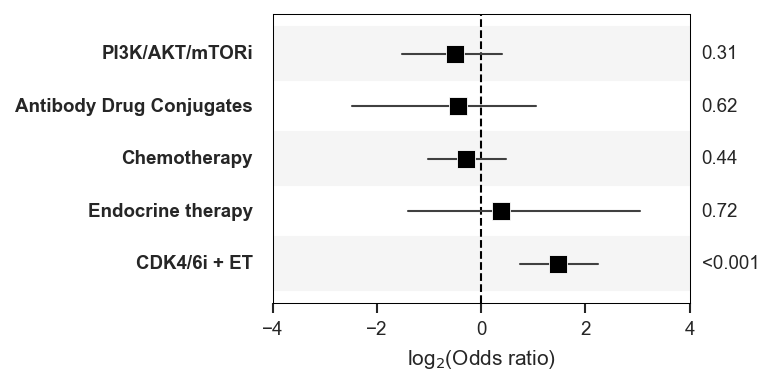

In [19]:

plot_df = df.copy()

# position and palette
ypos = np.arange(len(plot_df))  # one y per row
plot_df['ypos'] = ypos


sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(4, 2.5), dpi=150)

# light alternating background bands 
for i in range(0, len(plot_df), 2):
    ax.axhspan(i-0.5, i+0.5, color='0.96', zorder=0)

# reference line at HR = 1
ax.axvline(0, ls='--', lw=1, color='black', zorder=1)


for _, r in plot_df.iterrows():
    # CI bar
    ax.plot([r['CI.low'], r['CI.high']], [r['ypos'], r['ypos']],
            color='0.25', lw=1, solid_capstyle='round', zorder=2)
    # square marker at HR
    ax.scatter(r['HR'], r['ypos'],
               s=70, marker='s',
                color='black',
               edgecolor='white', linewidth=0.4,
               zorder=3)

# y axis
ax.set_yticks(ypos)
ax.set_yticklabels(plot_df['comparison'])
ax.invert_yaxis()  
ax.grid(False)
#manual reannotation of labels
ax.set_yticklabels(
    [
    'PI3K/AKT/mTORi',
    'Antibody Drug Conjugates',
    'Chemotherapy',
    'Endocrine therapy',
    'CDK4/6i + ET',
    ],
    # #put HR and confidence intervals in the y axis labels
    # [f"{row['HR']:.2f} ({row['CI.low']:.2f} - {row['CI.high']:.2f})"
    #  for _, row in plot_df.iterrows()],
    fontsize=9, 
    fontweight='bold', 
    va ='center')


# x axis
ax.set_xticks([-4, -2, 0, 2, 4])
ax.tick_params(axis='x',
               which='major',
               bottom=True, top=False,    
               length=5, width=1,         
               direction='out')
ax.tick_params(axis='x', labelsize=9)


# major axis
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

# x range
# xmin = max(0.1, plot_df['CI.low'].min()*0.9)
# xmax = plot_df['CI.high'].max()*1.05
# ax.set_xlim(xmin, xmax)
ax.set_xlabel('log$_2$(Odds ratio)', fontsize=10)
ax.set_ylabel('')


# p values
for _, r in plot_df.iterrows():
    ax.text(xmax*1.3, r['ypos'], f"{r['p']}",
            va='center', ha='left', fontsize=9)

plt.subplots_adjust(right=0.82)


#for modifying text in illustrator
import matplotlib as mpl
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['font.family'] = 'Arial'  

# sns.despine(left=True, bottom=False)
plt.savefig('/Users/boscoll/Desktop/Projects/Anton_RB1/results/supplementary_3.pdf', bbox_inches='tight')
plt.show()

# 3.1

In [13]:
df = pd.read_csv('/Users/boscoll/Desktop/Projects/Anton_RB1/data/RB1_acquired_by_previous_tx_updated.csv', index_col=1)

In [14]:
order = [
    'PI3K.AKT', 
    'ADC', 
    'Chemo', 
    'ET', 
    'CDK'
]
df = df.reindex(order)
df = df.reset_index('term')
df.rename(columns={'term': 'comparison'}, inplace=True)
df.rename(columns={'estimate':'HR'}, inplace=True)

In [15]:
df.rename(columns={'conf.high': 'CI.high', 'conf.low': 'CI.low', 'OR': 'HR', 'p.value': 'p'}, inplace=True)

In [16]:
df.p = ['<0.001' if p < 0.001 else f"{p:.2f}" for p in df['p']]

In [17]:
#put as log
df['HR'] = np.log2(df['HR'])
df['CI.low'] = np.log2(df['CI.low'])
df['CI.high'] = np.log2(df['CI.high'])

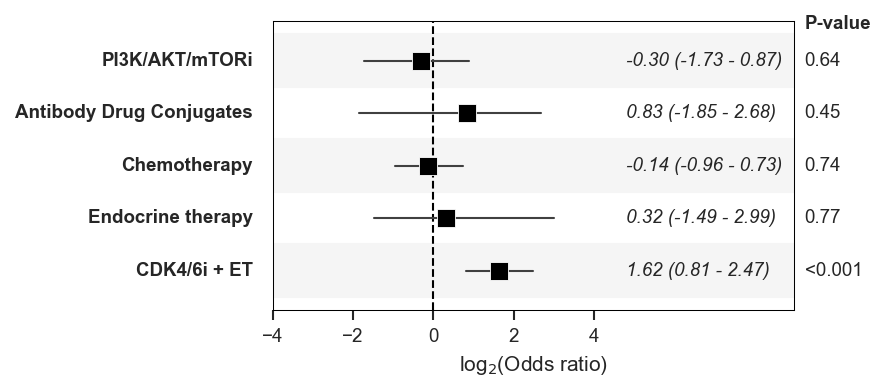

In [67]:

plot_df = df.copy()

# position and palette
ypos = np.arange(len(plot_df))  # one y per row
plot_df['ypos'] = ypos


sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(5, 2.5), dpi=150)

# light alternating background bands 
for i in range(0, len(plot_df), 2):
    ax.axhspan(i-0.5, i+0.5, color='0.96', zorder=0)

# reference line at HR = 1
ax.axvline(0, ls='--', lw=1, color='black', zorder=1)


for _, r in plot_df.iterrows():
    # CI bar
    ax.plot([r['CI.low'], r['CI.high']], [r['ypos'], r['ypos']],
            color='0.25', lw=1, solid_capstyle='round', zorder=2)
    # square marker at HR
    ax.scatter(r['HR'], r['ypos'],
               s=70, marker='s',
                color='black',
               edgecolor='white', linewidth=0.4,
               zorder=3)

# y axis
ax.set_yticks(ypos)
ax.set_yticklabels(plot_df['comparison'])
ax.invert_yaxis()  
ax.grid(False)
#manual reannotation of labels
ax.set_yticklabels(
    [
    'PI3K/AKT/mTORi',
    'Antibody Drug Conjugates',
    'Chemotherapy',
    'Endocrine therapy',
    'CDK4/6i + ET',
    ],
    # #put HR and confidence intervals in the y axis labels
    # [f"{row['HR']:.2f} ({row['CI.low']:.2f} - {row['CI.high']:.2f})"
    #  for _, row in plot_df.iterrows()],
    fontsize=9, 
    fontweight='bold', 
    va ='center')


# x axis
ax.set_xticks([-4, -2, 0, 2, 4])
ax.tick_params(axis='x',
               which='major',
               bottom=True, top=False,    
               length=5, width=1,         
               direction='out')
ax.tick_params(axis='x', labelsize=9)


# major axis
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

# x range
# xmin = max(0.1, plot_df['CI.low'].min()*0.9)
# xmax = plot_df['CI.high'].max()*1.05
# ax.set_xlim(xmin, xmax)
ax.set_xlabel('log$_2$(Odds ratio)', fontsize=10)
ax.set_ylabel('')
xmax = plot_df['CI.high'].max()*3
ax.set_xlim(-4, xmax)

#confidence intervals
for _, r in plot_df.iterrows():
    ax.text(plot_df['CI.high'].max()*1.6, r['ypos'], f"{r['HR']:.2f} ({r['CI.low']:.2f} - {r['CI.high']:.2f})",
            va='center', ha='left', fontsize=9, fontstyle='italic')



# p values
for _, r in plot_df.iterrows():
    ax.text(xmax * 1.03, r['ypos'], f"{r['p']}",
            va='center', ha='left', fontsize=9)
    
ax.text(xmax * 1.03, -0.7, 'P-value', va='center', ha='left', fontsize=9, fontweight='bold')

plt.subplots_adjust(right=0.82)


#for modifying text in illustrator
import matplotlib as mpl
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['font.family'] = 'Arial'  

# sns.despine(left=True, bottom=False)
plt.savefig('/Users/boscoll/Desktop/Projects/Anton_RB1/results/supplementary_3_V2.pdf', bbox_inches='tight')
plt.show()

# Rebuttal forest plot PALOMA

In [68]:
df = pd.DataFrame({
    "comparison": [
        "PFS - Palbociclib + Fulvestrant (n=)",
        "PFS - Placebo + Fulvestrant",
        "OS - Palbociclib + Fulvestrant",
        "OS - Placebo + Fulvestrant"
    ],
    "HR": [0.456, 0.564, 0.305, 0.689],
    "CI.low": [0.262, 0.294, 0.188, 0.359],
    "CI.high": [0.794, 1.084, 0.495, 1.322], 
     "p": [0.0055, 0.0858, 0.0001, 0.2620], 
     'Nr. LOH': [19, 11, 19, 11], 
     'Nr. WT' : [240, 131, 240, 131]
})

In [69]:
df

,comparison,HR,CI.low,CI.high,p,Nr. LOH,Nr. WT
0,PFS - Palbociclib + Fulvestrant (n=),0.456,0.262,0.794,0.0055,19,240
1,PFS - Placebo + Fulvestrant,0.564,0.294,1.084,0.0858,11,131
2,OS - Palbociclib + Fulvestrant,0.305,0.188,0.495,0.0001,19,240
3,OS - Placebo + Fulvestrant,0.689,0.359,1.322,0.2620,11,131


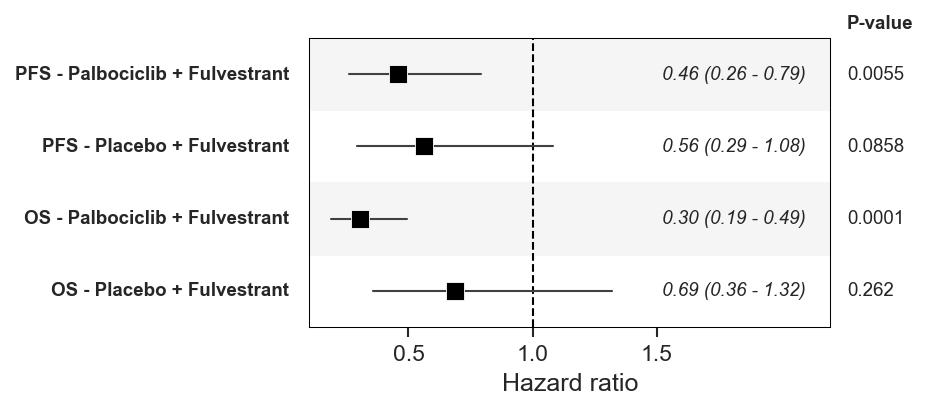

In [67]:

plot_df = df.copy()

# position and palette
ypos = np.arange(len(plot_df))  # one y per row
plot_df['ypos'] = ypos


sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(5, 2.5), dpi=150)

# light alternating background bands 
for i in range(0, len(plot_df), 2):
    ax.axhspan(i-0.5, i+0.5, color='0.96', zorder=0)

# reference line at HR = 1
ax.axvline(1, ls='--', lw=1, color='black', zorder=1)


for _, r in plot_df.iterrows():
    # CI bar
    ax.plot([r['CI.low'], r['CI.high']], [r['ypos'], r['ypos']],
            color='0.25', lw=1, solid_capstyle='round', zorder=2)
    # square marker at HR
    ax.scatter(r['HR'], r['ypos'],
               s=70, marker='s',
                color='black',
               edgecolor='white', linewidth=0.4,
               zorder=3)

# y axis
ax.set_yticks(ypos)
ax.set_yticklabels(plot_df['comparison'])
ax.invert_yaxis()  
ax.grid(False)
#manual reannotation of labels
ax.set_yticklabels(
    [
    'PFS - Palbociclib + Fulvestrant',
    'PFS - Placebo + Fulvestrant',
    'OS - Palbociclib + Fulvestrant',
    'OS - Placebo + Fulvestrant'
    ],
    # #put HR and confidence intervals in the y axis labels
    # [f"{row['HR']:.2f} ({row['CI.low']:.2f} - {row['CI.high']:.2f})"
    #  for _, row in plot_df.iterrows()],
    fontsize=9, 
    fontweight='bold', 
    va ='center')
ax.set_ylim(3.5, -0.5)


# x axis
ax.set_xticks([0.5, 1, 1.5])
ax.tick_params(axis='x',
               which='major',
               bottom=True, top=False,    
               length=5, width=1,         
               direction='out')


# major axis
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

# x range
xmin = 0.1
xmax = 2.2
ax.set_xlim(xmin, xmax)
ax.set_xlabel('Hazard ratio')
ax.set_ylabel('')


# p values
for _, r in plot_df.iterrows():
    ax.text(xmax * 1.03, r['ypos'], f"{r['p']}",
            va='center', ha='left', fontsize=9)
    
ax.text(xmax * 1.03, -0.7, 'P-value', va='center', ha='left', fontsize=9, fontweight='bold')

plt.subplots_adjust(right=0.82)

#confidence intervals
for _, r in plot_df.iterrows():
    ax.text(plot_df['CI.high'].max()*1.15, r['ypos'], f"{r['HR']:.2f} ({r['CI.low']:.2f} - {r['CI.high']:.2f})",
            va='center', ha='left', fontsize=9, fontstyle='italic')

#for modifying text in illustrator
import matplotlib as mpl
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['font.family'] = 'Arial'  


# plt.subplots_adjust(top=0.95, bottom=0.3) #adjusting space below


# # sns.despine(left=True, bottom=False)
plt.savefig('/Users/boscoll/Desktop/Projects/Anton_RB1/results/forest_rebuttal_paloma_v1.pdf', bbox_inches='tight')
plt.show()

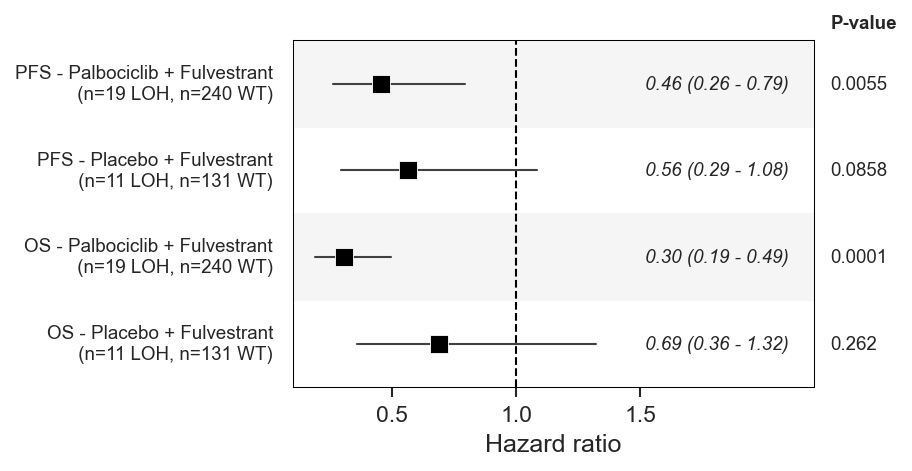

In [77]:

## Same including n numbers


plot_df = df.copy()

# position and palette
ypos = np.arange(len(plot_df))  # one y per row
plot_df['ypos'] = ypos


sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(5, 3), dpi=150)

# light alternating background bands 
for i in range(0, len(plot_df), 2):
    ax.axhspan(i-0.5, i+0.5, color='0.96', zorder=0)

# reference line at HR = 1
ax.axvline(1, ls='--', lw=1, color='black', zorder=1)


for _, r in plot_df.iterrows():
    # CI bar
    ax.plot([r['CI.low'], r['CI.high']], [r['ypos'], r['ypos']],
            color='0.25', lw=1, solid_capstyle='round', zorder=2)
    # square marker at HR
    ax.scatter(r['HR'], r['ypos'],
               s=70, marker='s',
                color='black',
               edgecolor='white', linewidth=0.4,
               zorder=3)

# y axis
ax.set_yticks(ypos)
ax.set_yticklabels(plot_df['comparison'])
ax.invert_yaxis()  
ax.grid(False)
#manual reannotation of labels
ax.set_yticklabels(
    [
    'PFS - Palbociclib + Fulvestrant\n (n=19 LOH, n=240 WT)',
    'PFS - Placebo + Fulvestrant\n (n=11 LOH, n=131 WT)',
    'OS - Palbociclib + Fulvestrant\n (n=19 LOH, n=240 WT)',
    'OS - Placebo + Fulvestrant\n (n=11 LOH, n=131 WT)'
    ],
    # #put HR and confidence intervals in the y axis labels
    # [f"{row['HR']:.2f} ({row['CI.low']:.2f} - {row['CI.high']:.2f})"
    #  for _, row in plot_df.iterrows()],
    fontsize=9, 
    # fontweight='bold', 
    va ='center')
ax.set_ylim(3.5, -0.5)


# x axis
ax.set_xticks([0.5, 1, 1.5])
ax.tick_params(axis='x',
               which='major',
               bottom=True, top=False,    
               length=5, width=1,         
               direction='out')


# major axis
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')

# x range
xmin = 0.1
xmax = 2.2
ax.set_xlim(xmin, xmax)
ax.set_xlabel('Hazard ratio')
ax.set_ylabel('')


# p values
for _, r in plot_df.iterrows():
    ax.text(xmax * 1.03, r['ypos'], f"{r['p']}",
            va='center', ha='left', fontsize=9)
    
ax.text(xmax * 1.03, -0.7, 'P-value', va='center', ha='left', fontsize=9, fontweight='bold')

plt.subplots_adjust(right=0.82)

#confidence intervals
for _, r in plot_df.iterrows():
    ax.text(plot_df['CI.high'].max()*1.15, r['ypos'], f"{r['HR']:.2f} ({r['CI.low']:.2f} - {r['CI.high']:.2f})",
            va='center', ha='left', fontsize=9, fontstyle='italic')

#for modifying text in illustrator
import matplotlib as mpl
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['pdf.fonttype'] = 'truetype'
mpl.rcParams['font.family'] = 'Arial'  


# plt.subplots_adjust(top=0.95, bottom=0.3) #adjusting space below


# # sns.despine(left=True, bottom=False)
plt.savefig('/Users/boscoll/Desktop/Projects/Anton_RB1/results/forest_rebuttal_paloma_v2.pdf', bbox_inches='tight')
plt.show()